In [1]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
import keras
from keras.preprocessing.text import Tokenizer
from nltk import word_tokenize,sent_tokenize
# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec
import matplotlib.font_manager as font_manager

sns.set_style('whitegrid',{"axes.facecolor": "0.99"})
sns.set_context('paper')
from matplotlib import rc # This will ensure images are having better font.
rc('font',**{'family':'serif','serif':['Times']}) # change into Helvetica if you like it more.
rc('text', usetex=True)
sns.color_palette("colorblind")
font = font_manager.FontProperties(family= 'Comic Sans MS', weight='bold', style='normal', size=16)
                                   

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read and Peak at Data
df = pd.read_csv("Womens Clothing E-Commerce Reviews 2.csv")

df.drop(df.columns[0],inplace=True, axis=1)


In [6]:
# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]
print (len(df))

22628


In [7]:
print (df.columns)

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [8]:
print (df['Department Name'])

0        Intimate
1         Dresses
2         Dresses
3         Bottoms
4            Tops
5         Dresses
6            Tops
7            Tops
8         Dresses
9         Dresses
10        Dresses
11        Dresses
12        Dresses
13       Intimate
14        Dresses
15        Bottoms
16        Bottoms
17           Tops
18        Jackets
19        Dresses
20           Tops
21        Dresses
22        Dresses
23        Dresses
24           Tops
25       Intimate
26           Tops
27        Bottoms
28       Intimate
29           Tops
           ...   
23454     Bottoms
23455     Dresses
23456     Dresses
23457    Intimate
23458        Tops
23459     Dresses
23460     Dresses
23461    Intimate
23462     Bottoms
23463    Intimate
23464     Dresses
23465     Dresses
23466     Dresses
23467     Dresses
23468    Intimate
23469    Intimate
23471    Intimate
23472        Tops
23473     Dresses
23474     Dresses
23475     Dresses
23476    Intimate
23477     Dresses
23478     Dresses
23479     

In [9]:
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

In [10]:
df_p = df[df['Label'] == 1]
df_n = df[df['Label'] == 0]

counts_p,bins_p = np.histogram(df_p['Rating'],bins=10)
counts_n,bins_n = np.histogram(df_n['Rating'],bins=10)

In [11]:
#df_p["Dress_type"] = 0
#df.groupby('Department Name')
df_top = df[df['Department Name']=='Tops']
df_bottom = df[df['Department Name']=='Bottoms']
df_dress = df[df['Department Name']=='Dresses']
df_intimate = df[df['Department Name']=='Intimate']
df_jacket = df[df['Department Name']=='Jackets']

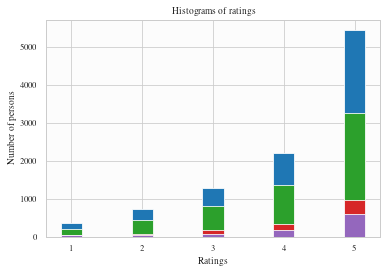

In [35]:

def dress_hist(df_input_column):
    data_ = df_input_column


    u_, inv_ = np.unique(data_, return_inverse=True)
    counts_ = np.bincount(inv_)
    return u_,counts_

u_top,counts_top = dress_hist(df_top['Rating'])
u_bottom,counts_bottom = dress_hist(df_bottom['Rating'])
u_dress,counts_dress = dress_hist(df_dress['Rating'])
u_intimate,counts_intimate = dress_hist(df_intimate['Rating'])
u_jacket,counts_jacket = dress_hist(df_jacket['Rating'])

#plt.subplot
plt.bar(u_top, counts_top, width=0.3,label='top')
plt.bar(u_bottom, counts_bottom, width=0.3,label='bottom')
plt.bar(u_dress, counts_dress, width=0.3,label='dress')
plt.bar(u_intimate, counts_intimate, width=0.3,label='intimate')
plt.bar(u_jacket, counts_jacket, width=0.3,label='jacket')

plt.xticks(np.arange(1,6))
plt.xlabel('Ratings')
plt.ylabel('Number of persons')
plt.title('Histograms of ratings')
plt.savefig('individual product ratings.png')

In [13]:
df_p_dress_dept = df_p[df_p['Department Name']=='Intimate']
df_n_dress_dept = df_n[df_n['Department Name']=='Intimate']
len(df_p_dress_dept),len(df_n_dress_dept)

(1506, 147)

In [14]:
dress_p =5464
dress_n =681
tops_p=8952
tops_n=1096
jackets_p=894
jackets_n=108
bottom_p=3345
bottom_n=317
intimate_p=1506
intimate_n=147


In [15]:
intimate_p/(intimate_p+intimate_n)

0.911070780399274

In [16]:
dress_r=88.91
top_r=89.09
jackets_r=89.22
bottom_r=91.34
intimate=91.10

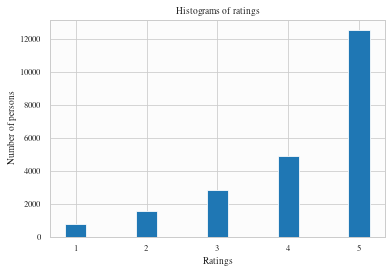

In [28]:

data = df['Rating']

u, inv = np.unique(data, return_inverse=True)
counts = np.bincount(inv)

plt.bar(u, counts, width=0.3)

plt.xticks(np.arange(1,6))
plt.xlabel('Ratings')
plt.ylabel('Number of persons')
plt.title('Histograms of ratings')
plt.savefig('ratings_histogram.png')
#plt.show()

In [18]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nirbanbose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from keras.preprocessing import sequence
tokenizer = Tokenizer(num_words=None,filters='!"#$%~^&()*+-/.:;,<=>?@[\\]_{|}\t\n',lower=True,split=' ')
tokenizer.fit_on_texts(df['Review Text'])
sequences = tokenizer.texts_to_sequences(df['Review Text'])
print (sequences[100])
df['Review Text'][100]

[1, 45, 267, 489, 3, 2, 124, 221, 5, 8, 29, 4, 58, 25, 12, 330, 2, 38, 141, 4, 97, 9, 1, 451, 3, 17, 1506, 27, 920, 691, 927]


"At first i wasn't sure about it. the neckline is much lower and wavy than i thought. but after wearing it, it really is comfortable. it stretches a lot, so i wear a cami underneath so when i lean forward i'm not showing the world my torso."

In [20]:
print ((tokenizer.word_index.keys()))

dict_keys(['the', 'i', 'and', 'a', 'it', 'is', 'this', 'to', 'in', 'but', 'on', 'for', 'of', 'with', 'was', 'so', 'my', 'dress', 'not', 'that', 'love', 'size', 'very', 'have', 'top', 'fit', 'are', 'like', 'be', 'as', 'me', 'wear', "it's", 'great', 'too', "i'm", 'or', 'am', 'just', 'you', 'would', 'they', 'up', 'at', 'fabric', 'small', 'color', 'look', 'if', 'more', 'really', 'ordered', 'little', 'perfect', 'will', 'one', 'these', 'flattering', 'well', 'an', 'soft', 'out', 'back', 'because', 'had', 'can', '\r', 'comfortable', 'cute', 'nice', 'than', 'bought', 'beautiful', 'when', 'all', 'looks', 'bit', 'fits', 'large', 'shirt', 'down', 'which', 'material', 'much', 'them', 'length', 'also', 'sweater', 'has', 'long', 'got', 'jeans', 'colors', 'waist', 'petite', 'quality', 'medium', 'xs', 'pretty', 'think', 'even', 'work', 'retailer', 'tried', 'from', 'store', 'usually', 'other', 'skirt', 'about', 'good', 'made', 'pants', 'short', 'get', 'way', 'only', 'could', 'big', 'cut', 'see', "don't"

In [21]:
from keras.preprocessing.sequence import pad_sequences


max_words =50;
X = pad_sequences(sequences, maxlen=max_words, truncating='post')
Y = df['Label']

len(X),len(Y)
np.shape(X)

(22628, 50)

In [24]:
# Load in embeddings
glove_vectors = 'glove.6B.100d.txt'
glove = np.loadtxt(glove_vectors, dtype='str', comments=None)
num_words = len(tokenizer.word_index) + 1
#word_idx = (len(tokenizer.word_index))+1
# Extract the vectors and words
vectors = glove[:, 1:].astype('float')
words = glove[:, 0]

# Create lookup of words to vectors
word_lookup = {word: vector for word, vector in zip(words, vectors)}

# New matrix to hold word embeddings
embedding_matrix = np.zeros((num_words, vectors.shape[1]))

for i, word in enumerate(tokenizer.word_index.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector

In [25]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));


X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

#y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(Y_test1).astype('float32').reshape((-1,1))

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

num_words = len(tokenizer.word_index) + 1  #num of words in vocabulary +1
max_words = 50  #should be same as padding length

model1 = Sequential()

# Embedding layer
model1.add(
    Embedding(input_dim=num_words,
              input_length = max_words,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150,  return_sequences=True));
model1.add(LSTM(150,  return_sequences=False))
#model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu', kernel_initializer='uniform'));#best 50,relu
model1.add(Dense(100, activation='relu', kernel_initializer='uniform'))
#model1.add(Dense(100, activation='relu', kernel_initializer='uniform'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'));
#print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
history = model1.fit(X_train, Y_train, batch_size=10, epochs=20, validation_data=(X_dev,Y_dev))
print(model1.summary())

Epoch 1/20
1924/1924 [==============================] - 289s 150ms/step - loss: 0.3474 - accuracy: 0.8950 - val_loss: 0.3161 - val_accuracy: 0.9045
Epoch 2/20
1924/1924 [==============================] - 257s 134ms/step - loss: 0.3356 - accuracy: 0.8954 - val_loss: 0.3152 - val_accuracy: 0.9045
Epoch 3/20
1924/1924 [==============================] - 270s 140ms/step - loss: 0.3351 - accuracy: 0.8954 - val_loss: 0.3173 - val_accuracy: 0.9045
Epoch 4/20
1924/1924 [==============================] - 281s 146ms/step - loss: 0.3150 - accuracy: 0.8954 - val_loss: 0.2801 - val_accuracy: 0.9045
Epoch 5/20
1924/1924 [==============================] - 286s 149ms/step - loss: 0.2877 - accuracy: 0.8954 - val_loss: 0.2708 - val_accuracy: 0.9045
Epoch 6/20
1924/1924 [==============================] - 311s 162ms/step - loss: 0.2775 - accuracy: 0.8954 - val_loss: 0.2668 - val_accuracy: 0.9045
Epoch 7/20
1924/1924 [==============================] - 304s 158ms/step - loss: 0.2686 - accuracy: 0.8954 - val_

In [37]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

50/50 [==============================] - 3s 64ms/step - loss: 0.2527 - accuracy: 0.8920
Test accuracy: 89.2045%


In [39]:
print (history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [42]:
from matplotlib import rc
rc("text", usetex=False)

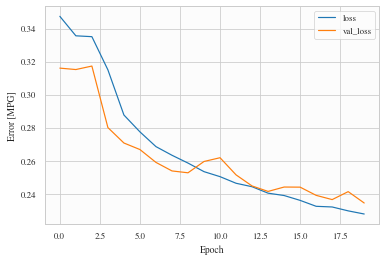

In [43]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)
plt.savefig('Loss.pn')

In [33]:
plt.plot(model1.fit.history['loss'], label='loss')
plt.plot(model1.fit.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

AttributeError: 'function' object has no attribute 'history'